In [2]:
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# mount your gdrive to colab instance
from google.colab import drive
drive.mount('/content/drive')

# copy kaggle credentials json
!mkdir /root/.kaggle
!cp "/content/drive/My Drive/whales/kaggle.json" /root/.kaggle

# copy dataset
!kaggle competitions download -c humpback-whale-identification

# unzipping
!mkdir -p /content/data
!cp sample_submission.csv train.csv /content/data

!unzip -q train.zip -d /content/data/train
!unzip -q test.zip -d /content/data/test

# checking
!ls /content/data!kaggle competitions download -c whale-categorization-playground
!unzip train.zip -d data
!unzip test.zip -d data
!ls data

In [3]:
df = pd.read_csv("train.csv")
# df = pd.read_csv("/data/workspace/all/train.csv")
df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [8]:
counts = df[["Id", "Image"]].groupby("Id").count().sort_values("Image", ascending=False)

print("mean: {}\n\nquantiles:\n{}\n".format(counts.mean(), counts.quantile([0.05, 0.25, 0.5, 0.75, 0.95])))
print("count of items being in excess of 10:\t{}".format(counts.Image[counts.Image > 10].size))

mean: Image    5.067133
dtype: float64

quantiles:
      Image
0.05    1.0
0.25    1.0
0.50    2.0
0.75    3.0
0.95   10.0

count of items being in excess of 10:	228


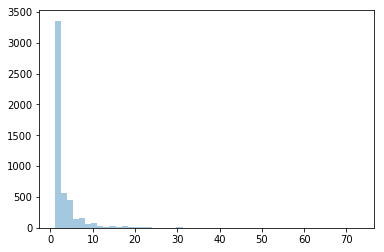

In [6]:
sns.distplot(df[df.Id != "new_whale"].groupby("Id").size(), 
             bins=50, kde=False, norm_hist=False)